In [1]:
!pip install keras


In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.layers import LSTM, Dense

In [6]:
# Load the dataset
data = pd.read_csv("/Users/Owner/Downloads/annual-co2-emissions-per-country.csv")

In [24]:
data = data[['Year', 'Annual CO₂ emissions']]
scaler = MinMaxScaler()
data[['Year', 'Annual CO₂ emissions']] = scaler.fit_transform(data[['Year', 'Annual CO₂ emissions']])

# Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:]

# Function to prepare data for time series forecasting
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - 9):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps:i + time_steps + 10].values)
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

# Prepare training data
X_train, y_train = create_dataset(train[['Year', 'Annual CO₂ emissions']], train['Annual CO₂ emissions'], TIME_STEPS)

# Prepare test data
X_test, y_test = create_dataset(test[['Year', 'Annual CO₂ emissions']], test['Annual CO₂ emissions'], TIME_STEPS)

# Define the LSTM model architecture
model = Sequential([
    LSTM(units=64, activation='relu', input_shape=(TIME_STEPS, 2)),
    Dense(units=50, activation='relu'),
    Dense(units=10)  # Output shape is (10,) for predicting CO2 emissions for the next 10 years
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)



Epoch 1/50


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0017 - val_loss: 4.1271e-04
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 2.5346e-04
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.0055e-04 - val_loss: 6.6960e-05
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.1358e-04 - val_loss: 9.2041e-05
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.1202e-04 - val_loss: 9.2256e-05
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.9171e-04 - val_loss: 8.4273e-05
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.3379e-04 - val_loss: 7.1929e-05
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.7921e-04 - val_loss: 2.8386e-05
Epoch 9/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.3727e-04 - val_loss: 5.7667e-05
Epoch 10/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.2218e-04 - val_loss: 4.9217e-05
Epoch 11/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.0502e-04 - val_

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE: 0.002640294984106368
RMSE: 0.018357668470659234
R-squared: 0.4304971852752287
Number of samples in the test set: 6043


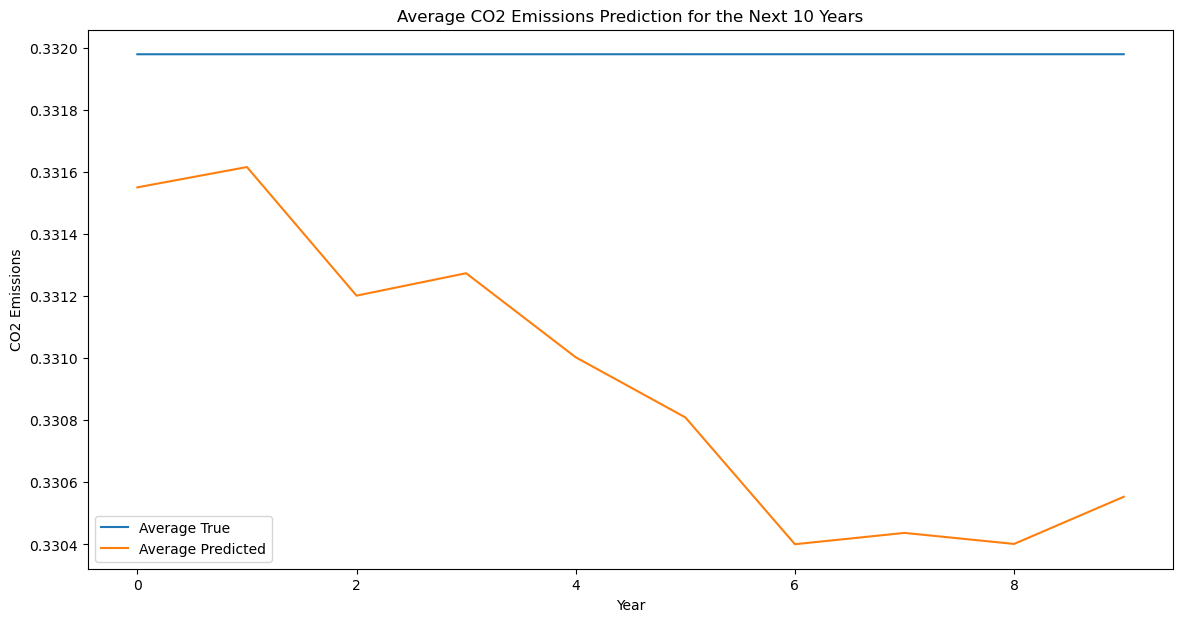

In [30]:
# Predict on the test data
y_pred = model.predict(X_test)

# Flatten y_test and y_pred for evaluation
y_test_flat = y_test.reshape(-1, 10)
y_pred_flat = y_pred.reshape(-1, 10)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y_train.reshape(-1, 1))
# Reverse the normalization for evaluation
y_test_unscaled = np.zeros_like(y_test_flat)
for i in range(y_test_flat.shape[1]):
    y_test_unscaled[:, i] = scaler.inverse_transform(y_test_flat[:, i].reshape(-1, 1)).flatten()

y_pred_unscaled = np.zeros_like(y_pred_flat)
for i in range(y_pred_flat.shape[1]):
    y_pred_unscaled[:, i] = scaler.inverse_transform(y_pred_flat[:, i].reshape(-1, 1)).flatten()

# Evaluation metrics
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

num_samples = y_test_unscaled.shape[0]
print("Number of samples in the test set:", num_samples)
y_test_avg = np.mean(y_test_unscaled, axis=0)
y_pred_avg = np.mean(y_pred_unscaled, axis=0)

# Plotting the average results
plt.figure(figsize=(14, 7))
plt.plot(y_test_avg, label='Average True')
plt.plot(y_pred_avg, label='Average Predicted')
plt.title('Average CO2 Emissions Prediction for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()